In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.image as mpimg
import splitfolders
import cv2
import glob



In [2]:

# FIXING IMAGES EXTENSIONS

for name in glob.glob('/car_plates/train_pics/*'):
    if '.JPG' in name:
        os.rename(name,name.replace('JPG','jpg'))


train_dataset=pd.read_csv(r'/car_plates/train_data.csv')
dataset=pd.read_csv(r'/car_plates/PoolLabels.csv')
dataset.head()

,img.name,label
0,car001.jpg,ر ب ل ١ ٨ ٢ ٧
1,car002.jpg,ى ن ر ٤ ٦ ٢ ٥
2,car003.jpg,ع س ط ١ ٣ ٧ ٥
3,car004.jpg,أ ج س ٤ ١ ٤ ٧
4,car005.jpg,ق ج ل ٢ ٧ ٣ ٩


In [3]:
# FUNCTION TO REFORMAT THE LABELS IN DATASET

def formatLabels(labels):
    count = 0
    labels = labels.apply(lambda x: x.replace(' ',''))
    labels = labels.apply(lambda x: x + "+"*(7-len(x)))
    labels = labels.apply(lambda x: list(x))        
    return labels

# FUNCTION TO REFORMAT THE IMAGES NAMES IN DATASET


def checkName(name):
    if 'JPG' in name:
        return name.replace('JPG','jpg')
    elif '.jpg' not in name:
        return name + '.jpg'
    else:
        return name
    
# RUNNING BOTH FUNCTIONS ON DATASET    
    
dataset['img.name']=dataset['img.name'].apply(checkName)
dataset['label'] = formatLabels(dataset.label)    

In [ ]:
decoding=["أ","ب","ج","د","ر","ز","س","ص","ط","ع","ف","ق","ل","م","ن","ه","و","ي","١","٢","٣","٤","٥","٦","٧","٨","٩","+","ك","ح"]

In [4]:
from keras.layers import StringLookup

arabic_num_alph={
    "أ":0,
    "ا":0,
    "ب":1,
    "ج":2,
    "د":3,
    "ر":4,
    "ز":5,
    "س":6,
    "ص":7,
    "ط":8,
    "ع":9,
    "ف":10,
    "ق":11,
    "ل":12,
    "م":13,
    "ن":14,
    "ه":15,
    "و":16,
    "ي":17,
    "ى":17,
    "١":18,
    "۱":18,
    "٢":19,
    "۲":19,
    "٣":20,
    "۳":20,
    "٤":21,
    "٥":22,
    "٦":23,
    "٧":24,
    "۷":24,
    "٨":25,
    "۸":25,
    "٩":26,
    "۹":26,
    "+":27,
    "ك":28,
    "ح":29}
  
# MAKING ARABIC LETTERS AND NUMBERS TO ENGLISH NUMBERS AS SYMBOLS

for index, label in enumerate(dataset['label']):
    i=0
    for char in label:
        if(char in arabic_num_alph.keys()):    
            label=label[:i]+[arabic_num_alph.get(char)]+label[i+1:]
            dataset['label'][index]=label
            i+=1
        else:
            
            dataset.drop(index=index,inplace=True)
            
            break
           

In [5]:
for index in range(1999):
   train_dataset = train_dataset.append(dataset.iloc[index])  

C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_10008\1722138957.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_dataset = train_dataset.append(dataset.iloc[index])
C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_10008\1722138957.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_dataset = train_dataset.append(dataset.iloc[index])
C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_10008\1722138957.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_dataset = train_dataset.append(dataset.iloc[index])
C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_10008\1722138957.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

In [6]:
train_directory='/car_plates/train_pics/'
img_path=[]
count=0
for image in train_dataset['img.name']:
    try:
        img_path.append(train_directory+train_dataset['img.name'][count])
        count+=1
    except:
        print(index)
        continue  

In [7]:
gray_scaled_dir='/car_plates/grayscaled/'
gray_scaled_path=[]
for index in range(1999):
    try:
        gray_scaled_path.append(gray_scaled_dir+train_dataset['img.name'][index])
    except:
        print(index)
        continue 

In [8]:

for index in range(1999):
    try:
        train_dataset['img.name'][index]=gray_scaled_path[index]
    except:
        print(index)
        continue    
    

In [9]:
train_dataset.head()

,img.name,label
0,/car_plates/grayscaled/car001.jpg,"[4, 1, 12, 18, 25, 19, 24]"
1,/car_plates/grayscaled/car002.jpg,"[17, 14, 4, 21, 23, 19, 22]"
2,/car_plates/grayscaled/car003.jpg,"[9, 6, 8, 18, 20, 24, 22]"
3,/car_plates/grayscaled/car004.jpg,"[0, 2, 6, 21, 18, 21, 24]"
4,/car_plates/grayscaled/car005.jpg,"[11, 2, 12, 19, 24, 20, 26]"


In [10]:
x=[]
y=train_dataset['label']
count=0
for img in img_path:
      img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, (128, 128))
      x.append(img)
      count+=1

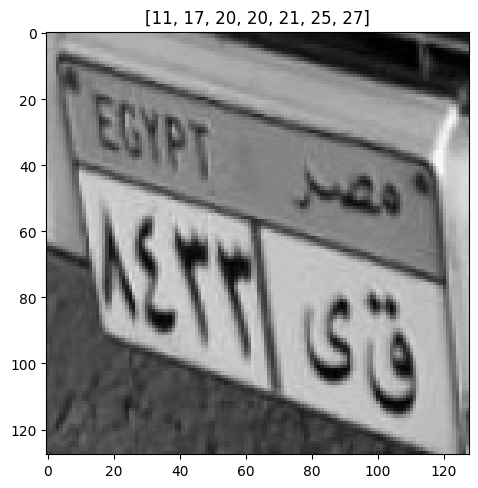

In [11]:
from PIL import Image
plt.figure(figsize = (12,10))
plt.subplot(1,2,1)

plt.title(y[1240])
plt.imshow(x[1240],cmap='gray')


In [12]:
from keras.preprocessing.image import ImageDataGenerator

# Generator For Augmentation 

train_datagen = ImageDataGenerator(
    rotation_range=15,shear_range=15,width_shift_range=0.05,
          height_shift_range=0.05,zoom_range=0.1
   
    
    )
test_datagen = ImageDataGenerator()

In [13]:
# Convert to array

x=np.asarray(x).astype('float64').reshape(-1,128,128,1)

y = np.array([np.array(val) for val in y])

#Normalization 
x=x/255


In [14]:
# AUGMENTATION 
x2=[]
y2=[]

for i in range(7):
    aug = train_datagen.flow(x, y,batch_size=1)
    x2 = x2 + [aug[i][0] for i in range(len(aug))]
    y2 = y2 + [aug[i][1] for i in range(len(aug))]

In [15]:
x2=np.asarray(x2).astype('float64').reshape(-1,128,128,1)

y2 = np.array([np.array(val) for val in y2])

y2=tf.reshape(y2,(-1,7))

In [16]:
import keras
def myModel():
    input = keras.Input(shape= (128,128,1))
    x = keras.layers.Conv2D(64, (3, 3), activation='relu',)(input)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Conv2D(64, (3, 3), activation='relu',)(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Conv2D(128, (3, 3), activation='relu',)(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Conv2D(512, (3, 3), activation='relu',)(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Dropout(0.4)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(1024, activation='relu',)(x)
    x = keras.layers.Dropout(0.4)(x)
    out1 = keras.layers.Dense(30, activation='softmax',name='Char1')(x)
    out2 = keras.layers.Dense(30, activation='softmax',name='Char2')(x)
    out3 = keras.layers.Dense(30, activation='softmax',name='Char3')(x)
    out4 = keras.layers.Dense(30, activation='softmax',name='Char4')(x)
    out5 = keras.layers.Dense(30, activation='softmax',name='Char5')(x)
    out6 = keras.layers.Dense(30, activation='softmax',name='Char6')(x)
    out7 = keras.layers.Dense(30, activation='softmax',name='Char7')(x)
    model = keras.models.Model(inputs=input,outputs=[out1,
                                                     out2,out3,out4,out5,out6,out7
                                                     ])
    return model

In [17]:
model =myModel()

In [18]:
model.compile(
    optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 63, 63, 64)   0           ['conv2d[0][0]']                 
                                                                                              

In [20]:
class myCallBack(keras.callbacks.Callback):
    def on_epoch_end(self,epoch, logs={}):
        acc_list = [logs[f'Char{i}_accuracy'] for i in range(1,8)]
        avg_acc = np.mean(acc_list)
        print(f"\nAverage accuracy: {avg_acc}")

       
    def on_test_end(self,logs={}):
        acc_list = [logs[f'Char{i}_accuracy'] for i in range(1,8)]
        print(f"\nAverage accuracy: {np.mean(acc_list)}\n")
        
callbacks = myCallBack()

In [21]:
model.fit(x=x2,y=[y2[:,0],y2[:,1],y2[:,2],y2[:,3],y2[:,4],y2[:,5],y2[:,6]], batch_size = 64, epochs = 30, verbose = 1,callbacks=callbacks)

Epoch 1/30
219/219 [==============================] - ETA: 0s - loss: 17.5903 - Char1_loss: 2.8075 - Char2_loss: 2.9141 - Char3_loss: 3.3079 - Char4_loss: 2.3105 - Char5_loss: 2.3413 - Char6_loss: 2.3407 - Char7_loss: 1.5682 - Char1_accuracy: 0.1283 - Char2_accuracy: 0.0744 - Char3_accuracy: 0.0515 - Char4_accuracy: 0.1309 - Char5_accuracy: 0.1168 - Char6_accuracy: 0.1216 - Char7_accuracy: 0.6134
Average accuracy: 0.1766903836812292
219/219 [==============================] - 493s 2s/step - loss: 17.5903 - Char1_loss: 2.8075 - Char2_loss: 2.9141 - Char3_loss: 3.3079 - Char4_loss: 2.3105 - Char5_loss: 2.3413 - Char6_loss: 2.3407 - Char7_loss: 1.5682 - Char1_accuracy: 0.1283 - Char2_accuracy: 0.0744 - Char3_accuracy: 0.0515 - Char4_accuracy: 0.1309 - Char5_accuracy: 0.1168 - Char6_accuracy: 0.1216 - Char7_accuracy: 0.6134
Epoch 2/30
219/219 [==============================] - ETA: 0s - loss: 17.1820 - Char1_loss: 2.7446 - Char2_loss: 2.8617 - Char3_loss: 3.2524 - Char4_loss: 2.2556 - Char5

KeyboardInterrupt: 